# WorkFlow<br>
1.Import Important Libraries<br>
2.Prepare the dataset<br>
3.Build the model<br>
4.Pick the loss function and optimizer<br>
5.Define trainning and evaluation loop function<br>
6.start the training loop<br>
7.visualize the training loop<br>
8.test model with new sentence(Sentiment analysis)<br>

In [ ]:
!pip install torch==2.3.0 torchtext==0.18.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.2/779.2 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.21.0+cu124 requires torch==2.6.0, but you have torch 2.3.0 which is incompatible.
torchaudio 2.6.0+cu124 requires torch==2.6.0, but you have torch 2.3.0 which is incompatible.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 

In [ ]:
import collections
import datasets
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchtext
import tqdm

### 2.Prepare your data

### Steps to prepare the data:
2.1 Load datasets<br>
2.2 tokenize you data<br>
2.3 creating data splits<br>
2.4 creating vocabulary<br>
2.5 vectorization<br>
2.6 converting into tensors<br>
2.7 creating dataloaders<br>

2.1 Load datasets

In [ ]:
train_data,test_data = datasets.load_dataset("stanfordnlp/imdb",split=["train","test"])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
train_data

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [ ]:
test_data

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

2.2 Tokenize the data

In [ ]:
from torchtext.data import get_tokenizer

/usr/local/lib/python3.11/dist-packages/torchtext/data/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


In [ ]:
tokenizer = get_tokenizer("basic_english")

In [ ]:
def tokenize_text(text,max_length):
  from torchtext.data import get_tokenizer
  tokenizer = get_tokenizer("basic_english")
  tokens = tokenizer(text["text"])[:max_length]
  return {
      "tokens":tokens
  }

In [ ]:
max_length = 256
train_data = train_data.map(tokenize_text,fn_kwargs={
    "max_length":max_length
})
test_data = test_data.map(tokenize_text,fn_kwargs={
    "max_length":max_length
})

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

2.3 Validation Data

In [ ]:
test_size = 0.25
train_validation_data = train_data.train_test_split(test_size=test_size)
train_data = train_validation_data["train"]
val_data = train_validation_data["test"]

2.4 Vocabulary

In [ ]:
from torchtext.vocab import build_vocab_from_iterator

/usr/local/lib/python3.11/dist-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.11/dist-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


In [ ]:
min_freq = 3
special_tokens = ["<unk>","<pad>"]
vocab = build_vocab_from_iterator(
    train_data["tokens"],
    min_freq=min_freq,
    specials=special_tokens
)

In [ ]:
unk_idx = vocab["<unk>"]
pad_idx = vocab["<pad>"]
pad_idx

1

In [ ]:
vocab.set_default_index(unk_idx)

5.5 Vectorize data

In [ ]:
def vectorize(text,vocab):
  idxs = vocab.lookup_indices(text["tokens"])
  return {
      "idxs": idxs
  }

In [ ]:
train_data = train_data.map(vectorize,fn_kwargs={
    "vocab":vocab
})
test_data = test_data.map(vectorize,fn_kwargs={
    "vocab":vocab
})
val_data = val_data.map(vectorize,fn_kwargs={
    "vocab":vocab
})

Map:   0%|          | 0/18750 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/6250 [00:00<?, ? examples/s]

5.6 Convert into Tensors

In [ ]:
train_data = train_data.with_format(type="torch", columns=["idxs", "label"])
val_data = val_data.with_format(type="torch", columns=["idxs", "label"])
test_data = test_data.with_format(type="torch", columns=["idxs", "label"])

5.7 Building the data loader

In [ ]:
def get_collate_fn(pad_index):
  def collate_fn(batch):
    batch_ids=[i["idxs"] for i in batch]
    batch_ids=nn.utils.rnn.pad_sequence(
        batch_ids,padding_value=pad_index,batch_first=True
    )
    batch_label=[i["label"] for i in batch]
    batch_label=torch.stack(batch_label)
    batch={"idxs":batch_ids,"label":batch_label}
    return batch

  return collate_fn

In [ ]:
def get_dataloader(datasets,batch_size,pad_index,shuffle=False):
  collate_fn = get_collate_fn(pad_index=pad_index)
  dataloader = torch.utils.data.DataLoader(
      datasets,batch_size=batch_size,shuffle=shuffle,collate_fn=collate_fn
  )
  return dataloader

In [ ]:
batch_size = 512
train_data_loader = get_dataloader(train_data,batch_size=batch_size,pad_index=pad_idx,shuffle=True)
test_data_loader = get_dataloader(test_data,batch_size=batch_size,pad_index=pad_idx)
val_data_loader = get_dataloader(val_data,batch_size=batch_size,pad_index=pad_idx)

### 3.Model Building

In [ ]:
class NBow(nn.Module):
  def __init__(self,vocab_size,embedding_dim,output_dim,pad_idx):
    super().__init__()
    self.Embedding = nn.Embedding(vocab_size,embedding_dim=embedding_dim,padding_idx=pad_idx)
    self.fc = nn.Linear(embedding_dim,output_dim)

  def forward(self,x):
    x = self.Embedding(x)
    pooled = x.mean(dim=1)
    x = self.fc(pooled)
    return x

In [ ]:
vocab_size = len(vocab)
embedding_dim = 300
output_dim = len((train_data.unique("label")))
model = NBow(vocab_size,embedding_dim,output_dim,pad_idx)

using pretrained embedding model

In [ ]:
vector = torchtext.vocab.GloVe()

.vector_cache/glove.840B.300d.zip: 2.18GB [06:50, 5.30MB/s]                            
100%|█████████▉| 2196016/2196017 [06:23<00:00, 5718.85it/s]


In [ ]:
pretrained_embedding=vector.get_vecs_by_tokens(vocab.get_itos())

In [ ]:
model.Embedding.weight.data = pretrained_embedding

### 4.Pick Optimizer and Loss Function

In [ ]:
learning_rate =1e-4

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
criterion = criterion.to(device)
model = model.to(device)

### Building the training and evalution

In [ ]:
def train(dataloader,model,criterion,optimizer,device):
  model.train()
  epoch_loss = []
  epoch_acc = []
  for batch  in tqdm.tqdm(dataloader,desc="training..."):
    idxs = batch["idxs"].to(device)
    label = batch["label"].to(device)
    prediction = model(idxs)
    loss = criterion(prediction,label)
    accuracy = get_accuracy(prediction,label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch_loss.append(loss.item())
    epoch_acc.append(accuracy)
  return np.mean(epoch_loss),np.mean(epoch_acc)


In [ ]:
def get_accuracy(prediction,label):
  batch_size,_ = prediction.shape
  predicted_class=prediction.argmax(dim=-1)
  correct_prediction = predicted_class.eq(label).sum()
  accuracy = correct_prediction/batch_size
  return accuracy

In [ ]:
def evaluate(dataloader,model,criterion,device):
  model.eval()
  eval_loss = []
  eval_acc = []
  with torch.no_grad():
    for batch in tqdm.tqdm(dataloader,desc="evaluating..."):
      idxs = batch["idxs"].to(device)
      label = batch["label"].to(device)
      prediction = model(idxs)
      loss = criterion(prediction,label)
      accuracy = get_accuracy(prediction,label)
      eval_loss.append(loss)
      eval_acc.append(accuracy)
    return np.mean(eval_loss),np.mean(eval_acc)

### Loop

In [ ]:
n_epochs = 10
best_val_loss = float("inf")
metrics = collections.defaultdict(list)

In [ ]:
for epoch in range(n_epochs):
  train_loss,train_acc = train(dataloader=train_data_loader,model=model,criterion=criterion,optimizer=optimizer,device=device)
  val_loss,val_acc = evaluate(val_data_loader,model,criterion,device)
  metrics["train_losses"].append(train_loss)
  metrics["train_accs"].append(train_acc)
  metrics["valid_losses"].append(val_loss)
  metrics["valid_acc"].append(val_acc)
  if val_loss < best_val_loss:
    best_val_loss = val_loss
    torch.save(model.state_dict(),"./nbow.pth")
  print(f"epoch:{epoch}")
  print(f"train_loss: {train_loss:.3f},train_acc: {train_acc:.3f}")
  print(f"valid_loss:{val_loss:.3f},valid_acc: {val_acc:3f}")

evaluating...: 100%|██████████| 13/13 [00:03<00:00,  3.79it/s]


epoch:0
train_loss: 0.691,train_acc: 0.527
valid_loss:0.689,valid_acc: 0.552836


evaluating...: 100%|██████████| 13/13 [00:02<00:00,  6.25it/s]


epoch:1
train_loss: 0.688,train_acc: 0.611
valid_loss:0.686,valid_acc: 0.610926


evaluating...: 100%|██████████| 13/13 [00:02<00:00,  5.95it/s]


epoch:2
train_loss: 0.684,train_acc: 0.638
valid_loss:0.683,valid_acc: 0.658373


evaluating...: 100%|██████████| 13/13 [00:02<00:00,  6.36it/s]


epoch:3
train_loss: 0.681,train_acc: 0.671
valid_loss:0.679,valid_acc: 0.681306


evaluating...: 100%|██████████| 13/13 [00:02<00:00,  4.96it/s]


epoch:4
train_loss: 0.677,train_acc: 0.688
valid_loss:0.676,valid_acc: 0.687089


evaluating...: 100%|██████████| 13/13 [00:02<00:00,  6.38it/s]


epoch:5
train_loss: 0.674,train_acc: 0.695
valid_loss:0.672,valid_acc: 0.693374


evaluating...: 100%|██████████| 13/13 [00:02<00:00,  6.13it/s]


epoch:6
train_loss: 0.670,train_acc: 0.709
valid_loss:0.668,valid_acc: 0.707295


evaluating...: 100%|██████████| 13/13 [00:02<00:00,  6.36it/s]


epoch:7
train_loss: 0.665,train_acc: 0.715
valid_loss:0.664,valid_acc: 0.717109


evaluating...: 100%|██████████| 13/13 [00:02<00:00,  6.33it/s]


epoch:8
train_loss: 0.661,train_acc: 0.723
valid_loss:0.659,valid_acc: 0.723243


evaluating...: 100%|██████████| 13/13 [00:02<00:00,  5.05it/s]


epoch:9
train_loss: 0.656,train_acc: 0.724
valid_loss:0.654,valid_acc: 0.729227


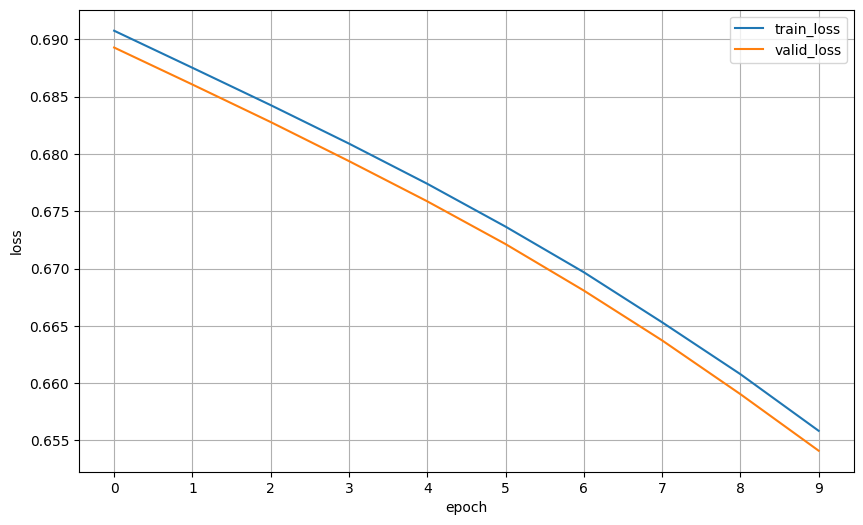

In [ ]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(1,1,1)
ax.plot(metrics["train_losses"],label="train_loss")
ax.plot(metrics["valid_losses"],label="valid_loss")
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_xticks(range(n_epochs))
ax.legend()
ax.grid()

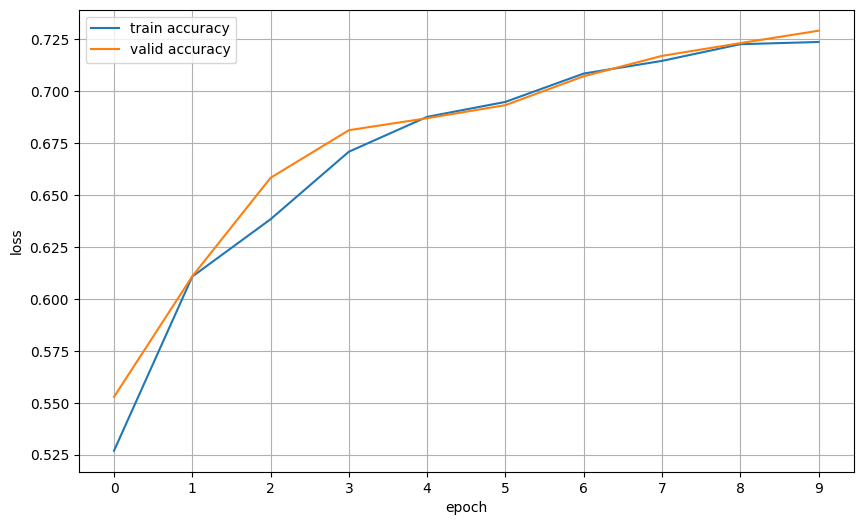

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(metrics["train_accs"], label="train accuracy")
ax.plot(metrics["valid_acc"], label="valid accuracy")
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_xticks(range(n_epochs))
ax.legend()
ax.grid()

In [ ]:
model.load_state_dict(torch.load("nbow.pth"))
test_loss,test_acc=evaluate(test_data_loader,model,criterion,device)

evaluating...: 100%|██████████| 49/49 [00:08<00:00,  5.67it/s]


In [ ]:
print(f"test_loss: {test_loss:.3f},test_acc:{test_acc:.3f}")

test_loss: 0.657,test_acc:0.710


### Testing model on new data

In [ ]:
def predict_sentiment(text,model,tokenizer,vocab,device):
  tokens=tokenizer(text)
  ids=vocab.lookup_indices(tokens)
  tensor=torch.LongTensor(ids).unsqueeze(dim=0).to(device)
  prediction=model(tensor).squeeze(dim=0)
  probability=torch.softmax(prediction,dim=-1)
  predicted_class=prediction.argmax(dim=-1).item()
  predicted_probability=probability[predicted_class].item()
  return predicted_class,predicted_probability

In [ ]:
text="this film is terrible"
predict_sentiment(text,model,tokenizer,vocab,device)

(0, 0.5661424994468689)

In [ ]:
text="this film is great"
predict_sentiment(text,model,tokenizer,vocab,device)

(1, 0.6680194735527039)

In [ ]:
text="this film is not terrible,it's great!"
predict_sentiment(text,model,tokenizer,vocab,device)

(0, 0.5637323260307312)